# Apparent Temperature

In [0]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# Loadind data

df = pd.read_csv('weather_data.csv')

## Variable Identification


In [3]:
df.shape

(5999, 12)

It looks like, we have 5999 records with 12 columns. lets look some of records of our data.

In [4]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
Formatted Date              5999 non-null object
Summary                     5999 non-null object
Precip Type                 5999 non-null object
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Wind Bearing (degrees)      5999 non-null int64
Visibility (km)             5999 non-null float64
Loud Cover                  5999 non-null int64
Pressure (millibars)        5999 non-null float64
Daily Summary               5999 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [6]:
# Categorical Variables

categorial = df.select_dtypes(include=['object']).keys()
print(categorial)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [7]:
# Quantitative Variables

quatitative = df.select_dtypes(include=['int64','float64']).keys()
print(quatitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


We have to create more variables for hourly visualization 

In [0]:
# DateTime, Hour Formation

df['Date'] = pd.to_datetime(df['Formatted Date'], utc='true')
df['Hour'] = df['Date'].dt.hour

In [9]:
df.shape

(5999, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 14 columns):
Formatted Date              5999 non-null object
Summary                     5999 non-null object
Precip Type                 5999 non-null object
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Wind Bearing (degrees)      5999 non-null int64
Visibility (km)             5999 non-null float64
Loud Cover                  5999 non-null int64
Pressure (millibars)        5999 non-null float64
Daily Summary               5999 non-null object
Date                        5999 non-null datetime64[ns, UTC]
Hour                        5999 non-null int64
dtypes: datetime64[ns, UTC](1), float64(6), int64(3), object(4)
memory usage: 656.2+ KB


In [11]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Hour
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00,22
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00,23
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00,1
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00,2


In [12]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Hour
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000,5999.000000
mean,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828,11.498250
std,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638,6.922013
min,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000,5.500000
50%,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000,11.000000
75%,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000,17.000000
max,34.005556,36.400000,1.000000,45.933300,359.000000,16.100000,0.0,1045.140000,23.000000


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


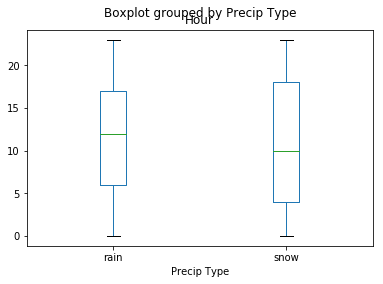

In [35]:
df.boxplot(by='Precip Type', column=['Hour'], grid='False')